# **Proyecto Data Science "Bank Customer Churn"**

# Descripción

A medida que la industria bancaria enfrenta una competencia cada vez mayor y mayores expectativas de los clientes, predecir con precisión la rotación de clientes se ha convertido en un factor crítico para los bancos en sus esfuerzos por retener a los clientes y mejorar su satisfacción general. Comprender los factores subyacentes que contribuyen a la pérdida de clientes puede proporcionar información valiosa que ayude a los bancos a desarrollar estrategias de retención específicas, optimizar la experiencia del cliente y mejorar las prácticas generales de gestión de relaciones con los clientes. Al aprovechar análisis avanzados y enfoques basados ​​en datos, los bancos pueden obtener una comprensión más profunda del comportamiento y las preferencias de los clientes, lo que les permite abordar la pérdida de clientes de manera más efectiva.



---



En esta Notebook se explorara el conjunto de datos para analizar el abandono de clientes y obtener información para ayudar al banco a mejorar las estrategias de retención de clientes.

Teniendo en cuanta los datos utilizado en este análisis que contiene información sobre los clientes del banco, incluidos sus detalles demográficos, puntaje de crédito, saldo de la cuenta, antigüedad y varias otras características. La variable de destino es "Exited" (salida), que indica si un cliente ha abandonado (1) o no (0), surguiran preguntas o hipótesis a responder que ayudaran a entender las problematicas referidas.

En el análisis exploratorio de datos, se utilizan gráficos para representar de manera visual la distribución de las variables categóricas y numéricas, y para mostrar las relaciones entre estas variables y la tasa de abandono de los clientes. Los gráficos permiten una comprensión más clara y rápida de los datos y pueden ayudar a identificar patrones y tendencias que no son evidentes solo con una tabla de datos. Seguido de una conclusion por cada grafico.

Se decidió utilizar una paleta de colores de la escala de azules para mantener una coherencia visual en toda la presentación, ya que proporciona un contraste agradable y fácil de distinguir con el fondo blanco de la trama. Además, el color azul se asocia comúnmente con la confianza, la estabilidad y la eficiencia, lo que encaja con la imagen que desea transmitir una entidad bancaria.

Para su mejor entendimiento del proyecto cuenta con un índice general que permite orientar los contenidos desarrollados desde la carga de datos hasta los algorismos utilizado para el modelo, su entrenamiento y testeo con la conclusion final.


---



# Audiencia

Este proyecto está dirigido a cualquier persona interesada en análisis de datos y modelos predictivo. También podría ser útil para la gerencia de una entidad bancaria o empresa de servicios interesados en identificar los factores que predominan en la tasa de abandono de los clientes.




---



# Índice

1.   Importación de datos y librerias
2.   Preguntas/Hipótesis a resolver
3.   Data Wrangling
* 3.1  Información general sobre el conjunto de datos
* 3.2  Exploración de datos duplicados
* 3.3  Exploración de datos nulos
* 3.4  Pivot
* 3.5  GroupBy
4.   Análisis Exploratorio de Datos
* 4.1  Distribución de variables categóricas
* 4.2  Relación entre las variables categóricas y la tasa de abandono
* 4.3  Distribución de variables numéricas
* 4.4  Relación entre las variables numericas y la tasa de abandono
* 4.5  Tasa de abandono
* 4.6  Análisis específicos para responder las preguntas de investigación
* 4.7  Informe sobre análisis de tasa de abandono de clientes
5.  Selección Features
* 5.1  Limpieza del dataset
* 5.2  Matrix de correlación
* 5.3  Generador de Dataframe
* 5.4  Metorología de selección de Features
* 5.4.1 Forward selection
* 5.4.2 Backward selection
* 5.4.3 Stepwise selection
6.  Entrenamiento y Testeo
* 6.1  División de datos
* 6.2 Entrenamiento y evaluación de modelos
* 6.2.1 Modelo de árbol de decisión
* 6.2.2 Regresión logística
* 6.2.3 Redes neuronales artificiales
* 6.3 Validación cruzada


7.   Optimización y selección de modelo
8.   Conclusión



















---



# 1.Importación de datos y librerias

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,confusion_matrix,ConfusionMatrixDisplay,accuracy_score, recall_score,precision_score
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as SequentialFeatureSelector2
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve, roc_curve, auc




import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    pvals = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
            pvals.append(new_pval.min())
            print(best_features, new_pval.min())
        else:
            break
    return best_features, pvals

def backward_elimination(data, target, significance_level = 0.05):
    features = data.columns.tolist()
    worst_features = []
    pvals = []
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        print(features, p_values.min())
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
            worst_features.append(excluded_feature)
            pvals.append(p_values.max())
        else:
            break
    return features, worst_features, pvals

def stepwise_selection(data, target, SL_in=0.05, SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            print(best_features, new_pval.min())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                    print(best_features, p_values.max())

                else:
                    break
        else:
            break
    return best_features,

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive/Data Science/datasets/'

/content/gdrive/MyDrive/Data Science/datasets


In [78]:
bank = pd.read_csv('https://raw.githubusercontent.com/Jpds2510/Bank-Customer-Churn/main/Customer-Churn-Records.csv')



---



# 2. Preguntas/Hipotesis a resolver



El objetivo principal de este proyecto es desarrollar un modelo predictivo para identificar los clientes que tienen más probabilidades de abandonar la entidad bancaria. Algunas preguntas que busco responder son:

*   ¿Cuanto influye la edad de los clientes a la hora de abandonar la empresa?
*   ¿Que tan importante son las quejas de los clientes como factor de salida?

*   ¿El nivel economico del clientes puede ser una tendencia de abandono?

*   ¿Los clientes del banco tienen una tasa de abandono más alta cuanto más tiempo están en el banco?


Para responder a estas preguntas, se realizará un análisis exploratorio de datos.-



---



# 3.Data Wrangling





##3.1Información general sobre el conjunto de datos

In [79]:
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
print(bank.shape)
print(bank.info())

(10000, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64 

Esto nos da una visión general de nuestros datos. Podemos ver que hay 10000 filas y 18 columnas en el conjunto de datos. Ahora, verificamos si hay valores duplicados en el conjunto de datos.

In [ ]:
columnas=['RowNumber','CustomerId','Surname','CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited','Complain','Satisfaction Score','Card Type','Point Earned']
dato=bank[columnas]
bank.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


## 3.2 Exploración de datos duplicados

In [ ]:
print(bank.shape)
train= bank.drop_duplicates()
print(bank.shape)

(10000, 18)
(10000, 18)


El resultado es cero, lo que indica que no hay registros duplicados en el conjunto de datos. A continuación, revisamos si hay valores nulos en el conjunto de datos.

## 3.3 Exploración de datos nulos

In [ ]:
bank.isna()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#columnas con cantidad de nulos
bank.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

El resultado nos indica que no hay valores nulos en ninguna de las columnas, lo que significa que no necesitamos tratar valores nulos.

## 3.4 Pivot

In [ ]:
bank.iloc[:10]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


In [ ]:
bank.iloc[:10].pivot('Surname','Age','Card Type')

Age,27,29,39,41,42,43,44,50
Surname,,,,,,,,
Bartlett,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SILVER
Boni,NaN,NaN,GOLD,NaN,NaN,NaN,NaN,NaN
Chu,NaN,NaN,NaN,NaN,NaN,NaN,DIAMOND,NaN
H?,GOLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hargrave,NaN,NaN,NaN,NaN,DIAMOND,NaN,NaN,NaN
He,NaN,NaN,NaN,NaN,NaN,NaN,GOLD,NaN
Hill,NaN,NaN,NaN,DIAMOND,NaN,NaN,NaN,NaN
Mitchell,NaN,NaN,NaN,NaN,NaN,GOLD,NaN,NaN
Obinna,NaN,DIAMOND,NaN,NaN,NaN,NaN,NaN,NaN


En este caso utilce la funcion Pivot para reordenar los datos por nombre segun la edad.

##3.5 GroupBy

In [ ]:
agrupa2 = bank.groupby(['Geography','Age'])

In [ ]:
agrupa2

In [ ]:
## cantidad de grupos
agrupa2.ngroups

196

In [ ]:
## tamaño de los grupos
agrupa2.size()

Geography  Age
France     18     11
           19     11
           20     21
           21     31
           22     45
                  ..
Spain      77      2
           78      2
           79      1
           80      1
           88      1
Length: 196, dtype: int64

In [ ]:
## primer registro de cada grupo
agrupa2.first()

RowNumber  CustomerId    Surname  CreditScore  Gender  Tenure  \
Geography Age                                                                  
France    18         747    15787619      Hsieh          844    Male       2   
          19        2312    15664639   McGregor          645    Male       9   
          20        1065    15699598      Smith          723  Female       4   
          21          70    15755648     Pisano          675  Female       8   
          22         285    15708608   Wallwork          799  Female       8   
...                  ...         ...        ...          ...     ...     ...   
Spain     77        2165    15794479     Becker          767    Male       8   
          78        5491    15722322      Green          655  Female       2   
          79        5069    15717879       Chen          712  Female       5   
          80        3995    15763097  Siciliano          809    Male       8   
          88        2459    15813303    Rearick          513    Male      10   

                 Balance  NumOfProducts  HasCrCard  IsActiveMember  \
Geography Age                                                        
France    18   160980.03              1          0               0   
          19   128514.84              1          0               0   
          20        0.00              2          1               1   
          21    98373.26              1          1               0   
          22   174185.98              2          0               1   
...                  ...            ...        ...             ...   
Spain     77   149083.70              1          1               1   
          78        0.00              2          0               1   
          79   108078.56              1          1               1   
          80        0.00              2          0               1   
          88        0.00              2          1               1   

               EstimatedSalary  Exited  Complain  Satisfaction Score  \
Geography Age                                                          
France    18         145936.28       0         0                   5   
          19         175969.19       0         0                   5   
          20         140385.33       0         0                   1   
          21          18203.00       0         0                   5   
          22         192633.85       0         0                   3   
...                        ...     ...       ...                 ...   
Spain     77         190146.83       0         0                   5   
          78         188435.38       0         0                   5   
          79         174118.93       0         0                   2   
          80          34164.05       0         0                   3   
          88          52952.24       0         0                   1   

              Card Type  Point Earned  
Geography Age                          
France    18    DIAMOND           821  
          19       GOLD           796  
          20   PLATINUM           360  
          21     SILVER           985  
          22   PLATINUM           219  
...                 ...           ...  
Spain     77       GOLD           383  
          78     SILVER           975  
          79       GOLD           583  
          80    DIAMOND           311  
          88   PLATINUM           627  

[196 rows x 16 columns]

In [ ]:
## obtener registros del grupo
Edad=agrupa2.get_group(('Spain',45))
Edad

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
18,19,15661507,Muldrow,587,Spain,Male,45,6,0.00,1,0,0,158684.81,0,0,3,PLATINUM,732
180,181,15716334,Rozier,850,Spain,Female,45,2,122311.21,1,1,1,19482.50,0,0,5,GOLD,739
388,389,15748936,Whitehead,709,Spain,Female,45,2,0.00,2,0,1,162922.65,0,0,1,PLATINUM,815
919,920,15733114,Hay,552,Spain,Male,45,9,0.00,2,1,0,26752.56,0,0,2,DIAMOND,723
1392,1393,15730540,Simpson,794,Spain,Male,45,8,88656.37,2,1,0,116547.31,0,0,4,DIAMOND,618
1420,1421,15753969,K'ung,724,Spain,Male,45,5,83888.54,1,0,1,34121.81,0,0,3,SILVER,559
1819,1820,15712319,Chukwukere,714,Spain,Male,45,8,150900.29,2,0,1,139889.15,0,0,5,DIAMOND,734
1984,1985,15737605,Morris,531,Spain,Female,45,1,126495.57,2,1,1,164741.50,0,0,2,GOLD,242
2138,2139,15688619,Scott,718,Spain,Male,45,3,105266.32,2,1,1,193724.51,0,0,5,SILVER,372
2293,2294,15801265,Tang,689,Spain,Female,45,0,57784.22,1,1,0,197804.00,1,1,3,SILVER,709


In [ ]:
agrupa2['EstimatedSalary'].max()

Geography  Age
France     18     171770.58
           19     175969.19
           20     197582.79
           21     197297.77
           22     198032.93
                    ...    
Spain      77     190146.83
           78     188435.38
           79     174118.93
           80      34164.05
           88      52952.24
Name: EstimatedSalary, Length: 196, dtype: float64

En este caso, utilizar GroupyBy para agrupar los datos, en el cual cree un grupo por pais segun la edad, en el primer caso seleccione las cantidad de clientes con 45 años de España, y en el segundo caso, sobre el grupo seleccionado verificar el salario maximo por edad.



---



# 4.Análisis Exploratorio de Datos



Se compone de 18 atributos:

RowNumber— corresponde al número de registro.

CustomerId— Número de identificación de los clientes.

Surname— Nombre del cliente

CreditScore— Limites de credito.

Geography— Pais de donde vive el cliente.

Gender— Genero del cliente.

Age— Edad del cliente

Tenure— Años de permanencia en el banco.(0 a 10 años)

Balance— Nivel patrimonial del cliente.

NumOfProducts— Cantidad de productos del banco que poseen.

HasCrCard— Si el cliente posee tarjeta de credito.(1-si,0-no)

IsActiveMember—Si el cliente activo.(1-si,0-no)

EstimatedSalary— Salario estimado del cliente.

Exited— si el cliente salió o no del banco.(1-si,0-no)

Complain— Si el cliente tiene queja o no.(1-si,0-no)

Satisfaction Score— Puntuación proporcionada por el cliente para la resolución de su reclamación.(1 al 5)

Card Type— Tipo de tarjeta.

Points Earned— los puntos obtenidos por el cliente por el uso de la tarjeta de crédito.


##4.1 Distribución de variables categóricas

<Axes: title={'center': 'Variable por tipo de tarjeta de credito'}, xlabel='Card Type', ylabel='count'>

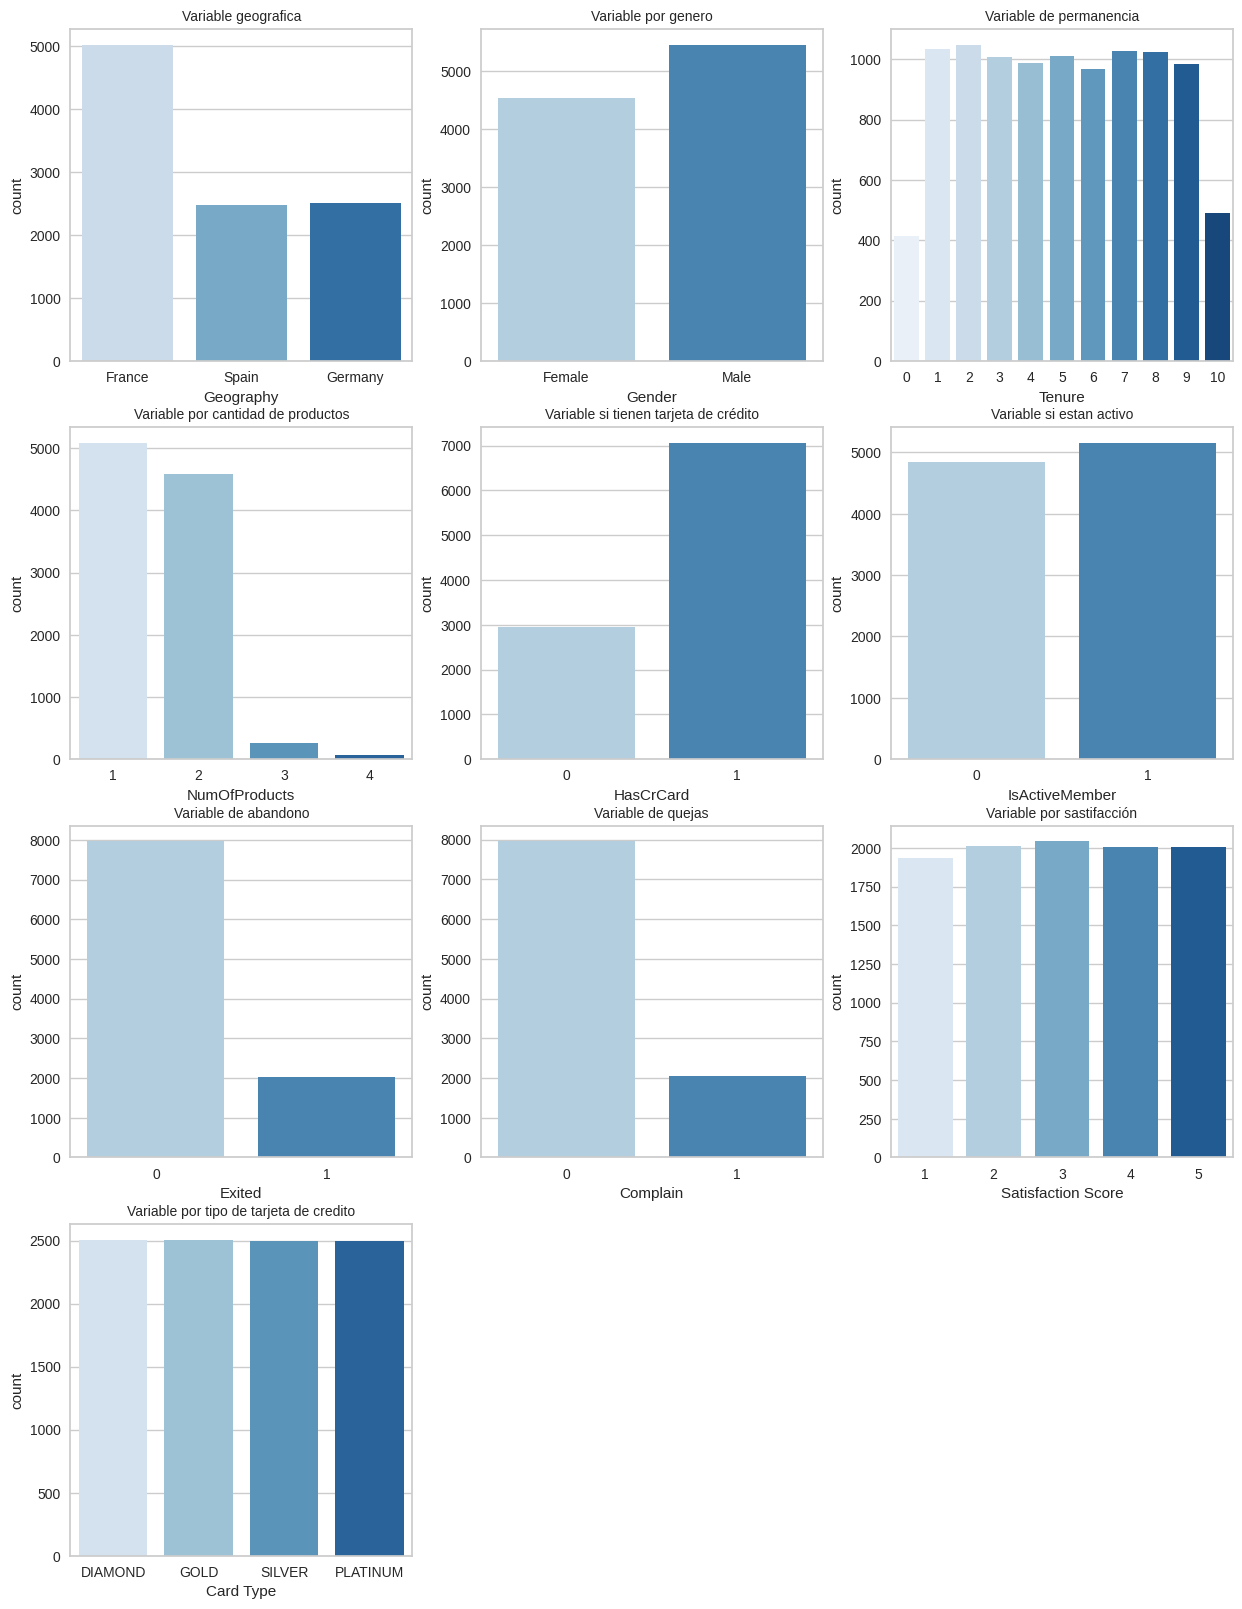

In [ ]:
plt.figure(figsize = (15,25))

#creo 10 graficos de cada variables
plt.subplot(5, 3, 1)
plt.gca().set_title('Variable geografica',fontdict = {'fontsize': 10})
sns.countplot(x = 'Geography', palette='Blues',data = bank)

plt.subplot(5, 3, 2)
plt.gca().set_title('Variable por genero',fontdict = {'fontsize': 10})
sns.countplot(x = 'Gender',palette='Blues', data = bank)

plt.subplot(5, 3, 3)
plt.gca().set_title('Variable de permanencia',fontdict = {'fontsize': 10})
sns.countplot(x = 'Tenure',palette='Blues', data = bank)

plt.subplot(5, 3, 4)
plt.gca().set_title('Variable por cantidad de productos',fontdict = {'fontsize': 10})
sns.countplot(x = 'NumOfProducts',palette='Blues', data = bank)

plt.subplot(5, 3, 5)
plt.gca().set_title('Variable si tienen tarjeta de crédito',fontdict = {'fontsize': 10})
sns.countplot(x = 'HasCrCard',palette='Blues', data = bank)

plt.subplot(5, 3, 6)
plt.gca().set_title('Variable si estan activo',fontdict = {'fontsize': 10})
sns.countplot(x = 'IsActiveMember',palette='Blues', data = bank)

plt.subplot(5, 3, 7)
plt.gca().set_title('Variable de abandono',fontdict = {'fontsize': 10})
sns.countplot(x = 'Exited',palette='Blues', data = bank)

plt.subplot(5, 3, 8)
plt.gca().set_title('Variable de quejas',fontdict = {'fontsize': 10})
sns.countplot(x = 'Complain',palette='Blues', data = bank)

plt.subplot(5, 3, 9)
plt.gca().set_title('Variable por sastifacción',fontdict = {'fontsize': 10})
sns.countplot(x = 'Satisfaction Score',palette='Blues', data = bank)

plt.subplot(5, 3, 10)
plt.gca().set_title('Variable por tipo de tarjeta de credito',fontdict = {'fontsize': 10})
sns.countplot(x = 'Card Type',palette='Blues', data = bank)


##4.2 Relación entre las variables categóricas y la tasa de abandono

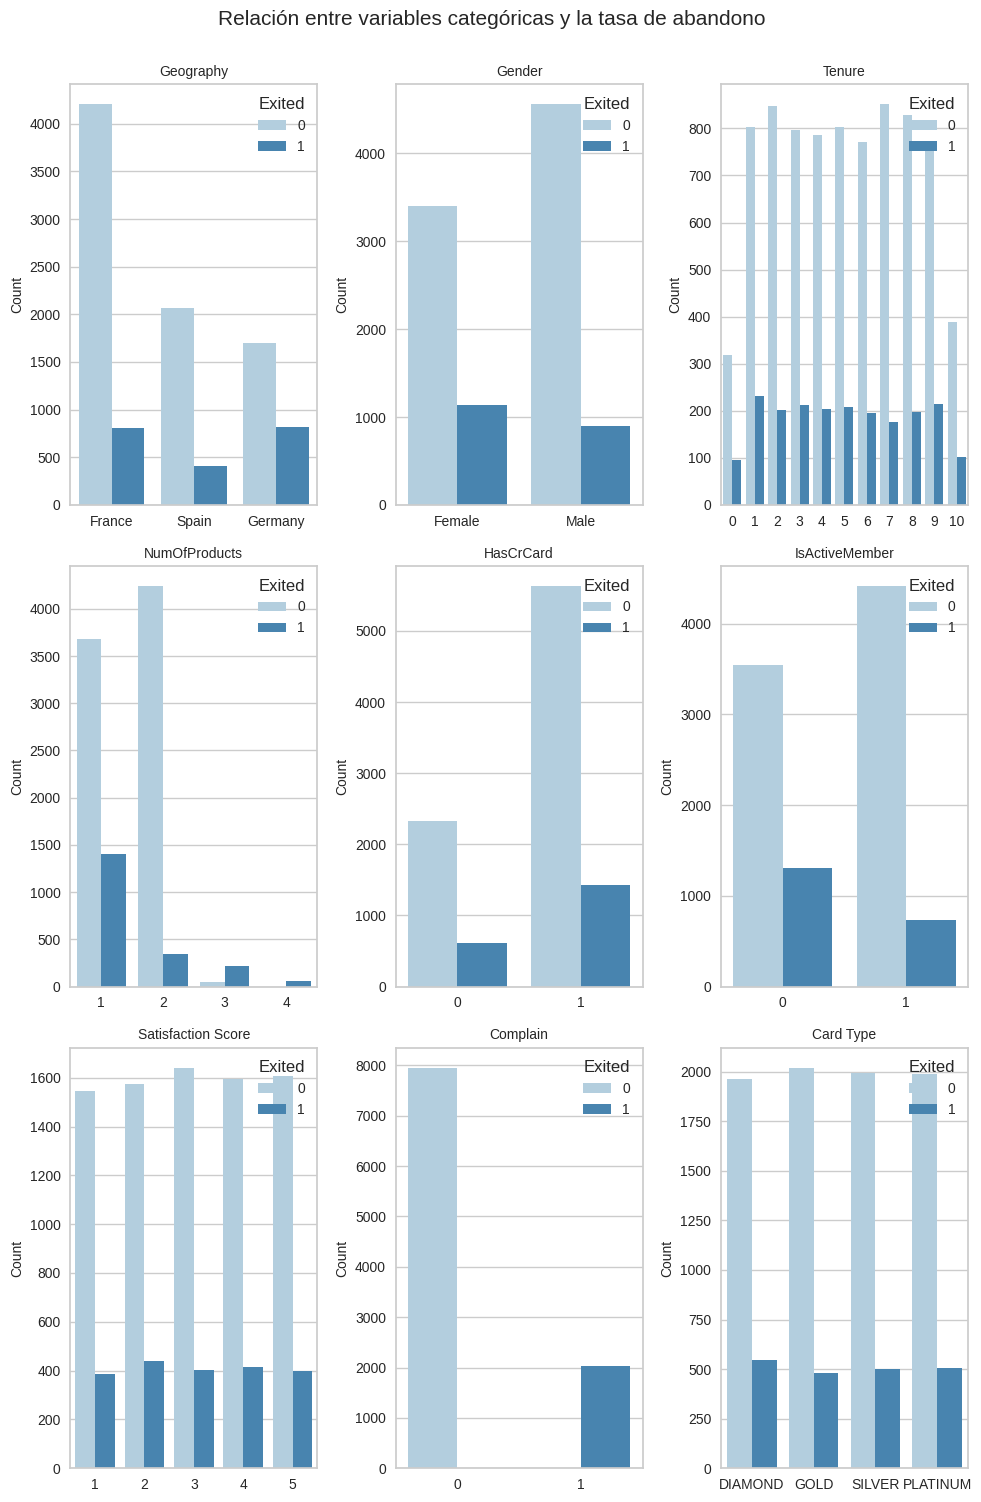

In [ ]:
# Variables categóricas
cat = ['Geography', 'Gender', 'Tenure', 'NumOfProducts','HasCrCard', 'IsActiveMember', 'Satisfaction Score', 'Complain', 'Card Type']
temp = bank[['Geography', 'Gender', 'Tenure', 'NumOfProducts','HasCrCard', 'IsActiveMember', 'Satisfaction Score', 'Complain', 'Card Type','Exited']]

# Genero gráficos de barras
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 15))

# Etiquetas en los ejes y títulos de los gráficos
fig.suptitle('Relación entre variables categóricas y la tasa de abandono', fontsize=15, y=1.0)

# Creo los gráficos de barras con un solo color
for i, col in enumerate(cat):
    row = i // 3
    pos = i % 3
    sns.countplot(x=col, hue='Exited', data=temp, ax=axs[row][pos], palette='Blues')
    axs[row][pos].set_title(col, fontsize=10)
    axs[row][pos].set_xlabel('')
    axs[row][pos].set_ylabel('Count', fontsize=10)
    axs[row][pos].legend(title='Exited', loc='upper right')

plt.tight_layout()
plt.show()

Teniendo en cuenta el analisis de las variables categoricas se puede determinar:

Por Genero:

La tasa de abandono es mayor para las clientes de genero femenino en comparación con los clientes masculinos. Esto indica que el género puede desempeñar un papel en la rotación de clientes.

Abandono por Geografía

La tasa de abandono varía según los diferentes países. Alemania tiene la tasa de abandono más alta, seguida de España y Francia. Esto sugiere que la ubicación geográfica puede afectar la rotación de clientes, con clientes en ciertos países más propensos a la rotación.


Número de Productos y abandono:

La cantidad de productos que tienen los clientes puede afectar la rotación. Los clientes con menos productos pueden tener menos probabilidades de abandonar, mientras que aquellos con más productos pueden tener una tasa de abandono más alta. Esta variable podría servir como un predictor útil para la variable de destino.

Tarjeta de crédito y abandono:

Tener una tarjeta de crédito no parece tener un impacto significativo en la rotación de clientes. La tasa de abandono parece similar para los clientes con y sin tarjeta de crédito. Por lo tanto, la propiedad de tarjetas de crédito por sí sola puede no ser un indicador fuerte de abandono.

Estado de actividad y abandono:

El estado de actividad del cliente es otro factor importante. Los miembros activos parecen tener una tasa de abandono más baja en comparación con los miembros inactivos. Esto sugiere que es más probable que los clientes comprometidos y activos permanezcan en el banco.




##4.3 Distribución de variables numéricas

<Axes: xlabel='Point Earned', ylabel='Count'>

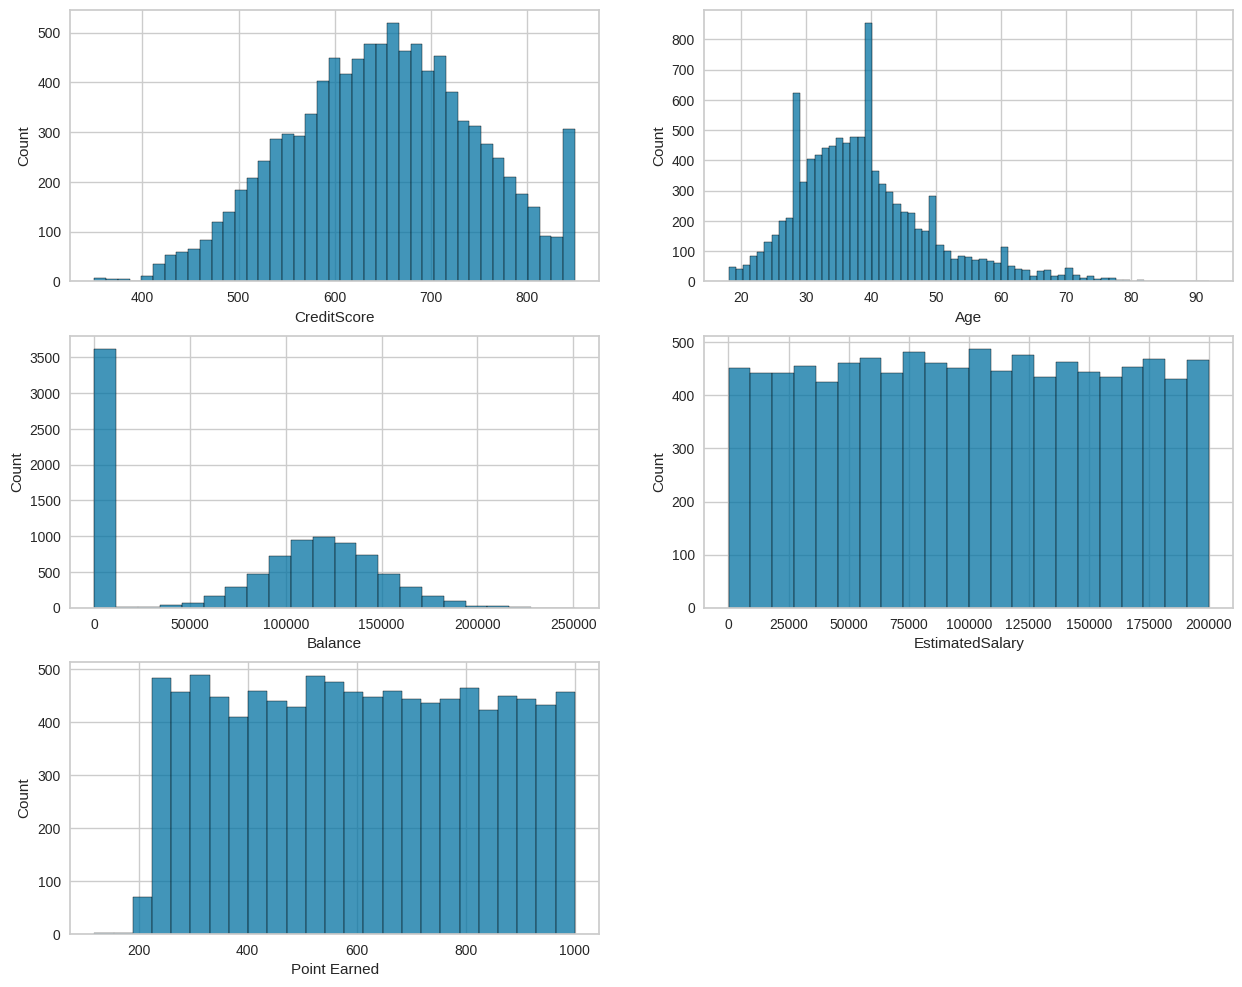

In [ ]:
#creo la figura
plt.figure(figsize = (15, 12))

#grafico en histograma las variables numericas
plt.subplot(3, 2, 1)
sns.histplot(x = bank['CreditScore'], kde = False)

plt.subplot(3, 2, 2)
sns.histplot(x = bank['Age'], kde = False)

plt.subplot(3, 2, 3)
sns.histplot(x = bank['Balance'], kde = False)

plt.subplot(3, 2, 4)
sns.histplot(x = bank['EstimatedSalary'], kde = False)

plt.subplot(3, 2, 5)
sns.histplot(x = bank['Point Earned'], kde = False)

##4.4 Relación entre las variables numericas y la tasa de abandono

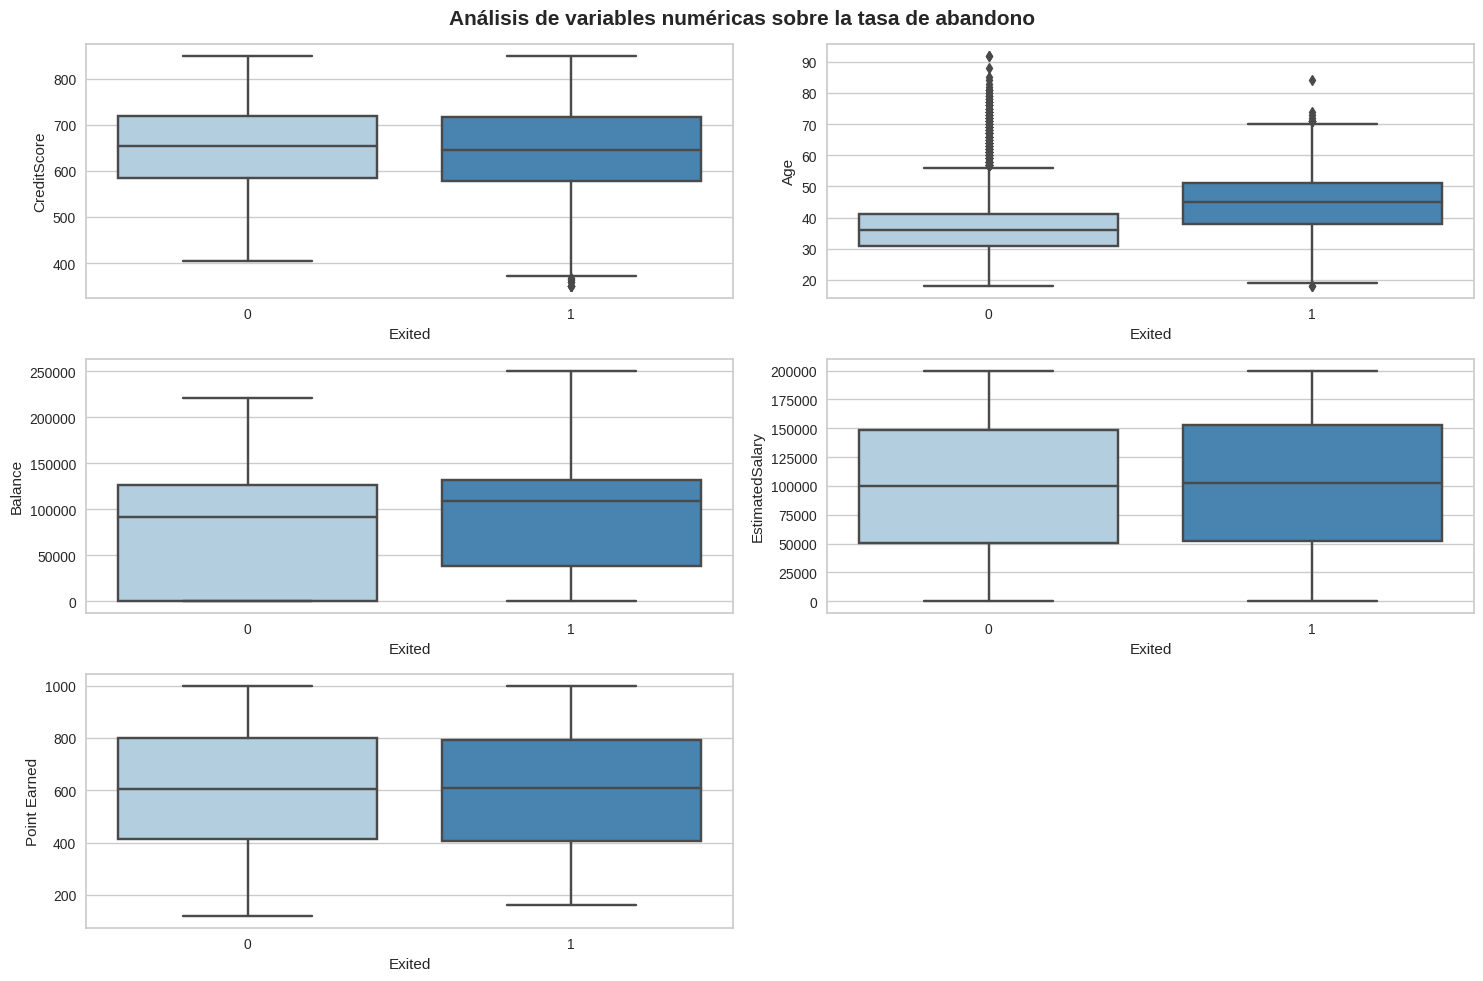

In [ ]:
# Creo la figura
plt.figure(figsize = (15, 10))

# Añado un título al gráfico
plt.suptitle("Análisis de variables numéricas sobre la tasa de abandono",fontweight="bold", fontsize=15)

# Grafico las relaciones entre las variables y la tasa de abandono
plt.subplot(3,2,1)
sns.boxplot(x="Exited", y="CreditScore", data=bank, palette='Blues')

plt.subplot(3,2,2)
sns.boxplot(x="Exited", y="Age", data=bank, palette='Blues')

plt.subplot(3,2,3)
sns.boxplot(x="Exited", y="Balance", data=bank, palette='Blues')

plt.subplot(3,2,4)
sns.boxplot(x="Exited", y="EstimatedSalary", data=bank, palette='Blues')

plt.subplot(3,2,5)
sns.boxplot(x="Exited", y="Point Earned", data=bank, palette='Blues')

plt.tight_layout()
plt.show()



Teniendo en cuento las variables numericas se pueden sacar las siguiente conclusiones:

Las diferentes distribuciones de 'Edad' y 'Saldo' implican que estas variables pueden tener un impacto significativo en la salida o no de un cliente.

## 4.5 Tasa de abandono

In [ ]:
Total_clientes = bank['CustomerId'].nunique()
Total_abandono_clientes = bank[bank['Exited'] == 1]['CustomerId'].nunique()
indabandono = Total_abandono_clientes / Total_clientes
print('Tasa de abandono: {:.2%}'.format(indabandono))

Tasa de abandono: 20.38%


## 4.6 Análisis específicos para responder las preguntas de investigación

### 1.¿Cuánto influye la edad de los clientes a la hora de abandonar la empresa?

Segun lo observado en las variables , una variable que me llamó la atención fue la variable Edad, por lo cual es la primera pregunta en cuestion a resolver, como influye la edad a la hora de analizar los factores de tasa de abandono.

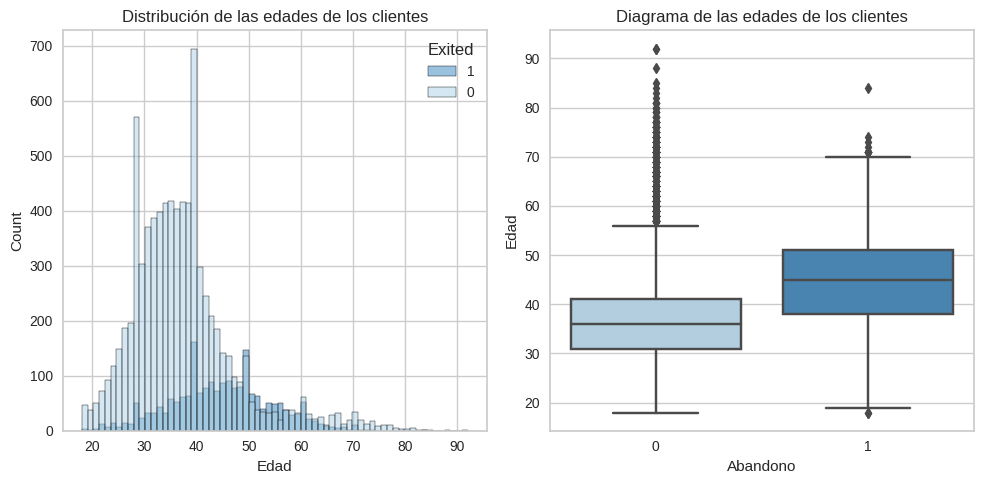

In [ ]:
# Creo la figura
fig, ax = plt.subplots(1, 2, figsize= (10, 5))

# Grafico la distribución de edad por tasa de abandono con una paleta de color azul
ax1 = sns.histplot(data=bank,x='Age',hue='Exited',ax=ax[0], palette='Blues')

# Configuro los ejes y títulos en el gráfico de distribución
ax1.set_title('Distribución de las edades de los clientes')
ax1.legend(title= 'Exited', labels= [1, 0])
ax1.set_xlabel('Edad')

# Grafico el diagrama de caja de edad por tasa de abandono con una paleta de color azul
ax2 = sns.boxplot(data= bank, y= 'Age', x= 'Exited', ax=ax[1], palette='Blues')

# Configuro los ejes y títulos en el gráfico de diagrama de caja
ax2.set_title('Diagrama de las edades de los clientes')
ax2.set_ylabel('Edad')
ax2.set_xlabel('Abandono')

plt.tight_layout()
plt.show()

Insights:

Como resultado da que la mayor tasa de abandono se observa en el grupo de edad de 50-60 años, seguido del grupo de edad de 40-50 años. La tasa de abandono más baja se observa en el grupo de edad menores de 30 años . Esto implica que es más probable que los clientes mayores abandonen, mientras que es más probable que los clientes más jóvenes permanezcan en el banco.

Se puede observar que el grupo de edad de los clientes que cierran sus cuentas es más avanzado, con una mediana de edad de 45 años.

### 2.¿Que tan importante son las quejas de los clientes como factor de salida?

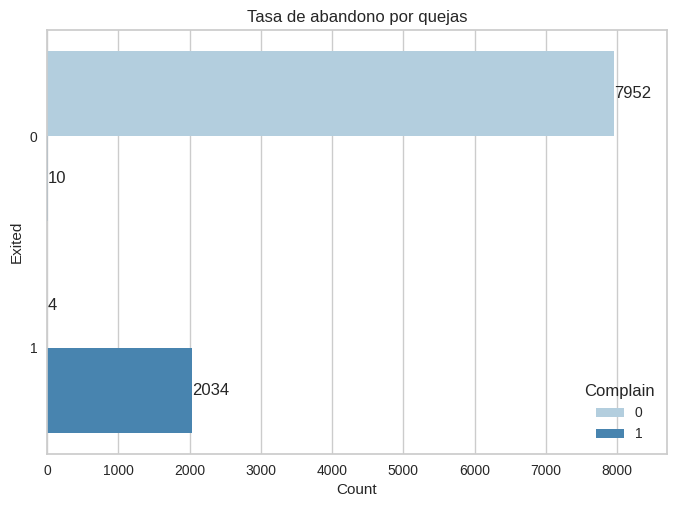

In [ ]:
# Creo el gráfico de barras con opción de paleta de color
ax = sns.countplot(data= bank, y= 'Exited', hue= 'Complain', palette='Blues')

# Añado un título al gráfico
ax.set_title('Tasa de abandono por quejas')

# Establezco las etiquetas de las barras
for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_ylabel('Exited')
ax.set_xlabel('Count')
ax.set_xlim([0, 8.7e3])
plt.show()

Insights:

La variable 'Complain'(quejas) está altamente relacionada con la variable 'Exited'(Salida). Casi el 99,6 % de los clientes que presentaron una queja finalmente se retiraron.
Prácticamente todos los clientes con quejas cerraron sus cuentas. Así como casi ningún cliente sin queja cerró su cuenta.

In [ ]:
import plotly.graph_objects as go

# Obtenemos el número de quejas y la cantidad de clientes que abandonaron entre los que presentaron quejas
complaints = bank[bank['Complain'] == 1]
complaints_exited = complaints[complaints['Exited'] == 1]
complaints_pct_exited = complaints_exited.shape[0] / complaints.shape[0] * 100

# Creamos la figura y definimos los colores
colors = ['#404788', '#7ea6ce']
fig = go.Figure()

# Agregamos el sector de los clientes que abandonaron entre los que presentaron quejas
fig.add_trace(go.Pie(
    labels=["Abandonaron", "Permanecieron"],
    values=[complaints_pct_exited, (100 - complaints_pct_exited)],
    hole=.3,
    direction='clockwise',
    marker=dict(colors=colors),
    name="",
    opacity=.8))

# Definimos las características de la figura
fig.update_layout(
    title_text="Porcentaje de clientes que abandonaron entre los que presentaron quejas",
    autosize=False,
    width=800,
    height=500,
    margin=dict(t=100, b=0, l=0, r=0),
    colorway=colors)

# Mostramos la figura
fig.show()

Insight:

Se agrega ese nuevo grafico para visualizar mejor el efecto de la variable complaint (quejas). Queda claro que es la variable con mas efecto con relacion a las causas relacionadas al abandono o permancencia de los clientes.-

### 3.¿El nivel economico del clientes puede ser una tendencia de abandono?

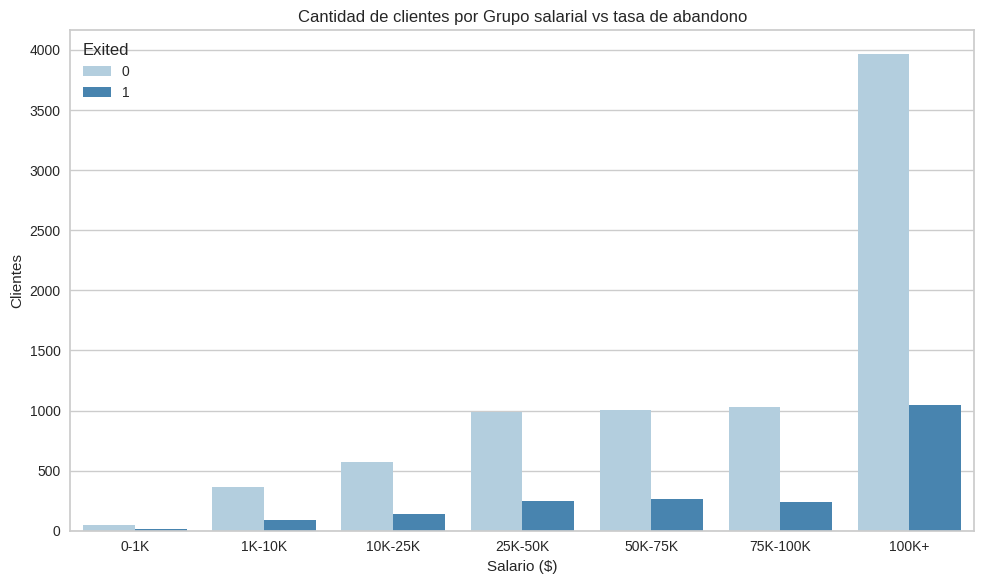

In [ ]:
# Creo los ejes
salario = [0,1000,10000,25000,50000,75000,100000,200000]
nivel_salario = ['0-1K','1K-10K','10K-25K','25K-50K','50K-75K','75K-100K','100K+']
bank['Salary Group'] = pd.cut(bank['EstimatedSalary'], bins=salario, labels=nivel_salario)

# Agrupo la cantidad de cliente por grupo salarial
agrup = bank.groupby(['Salary Group', 'Exited']).size().reset_index(name='Number of Customers')

# Ordeno los datos agregados en orden ascendente
agrup_asc = agrup.sort_values(by='Number of Customers', ascending=False)

# Creao la figura
plt.figure(figsize=(10,6))

# Creo el gráfico de barras con una paleta de color azul
sns.barplot(data=agrup_asc ,x='Salary Group', y='Number of Customers', hue='Exited', palette='Blues')

# Establezco las etiquetas de los ejes y el título del gráfico
plt.xlabel('Salario ($)')
plt.ylabel('Clientes')
plt.title('Cantidad de clientes por Grupo salarial vs tasa de abandono')

plt.tight_layout()
plt.show()

Insights:

El gráfico muestra que los clientes con salarios más altos tienen una menor tendencia a abandonar el banco.

Causa:

Mejores tratos y ofertas: el banco brinda tratos y ofertas atractivos a los clientes con ingresos más altos, lo que los hace menos propensos a cambiarse a otro banco.
Estabilidad financiera: los clientes con salarios más altos a menudo tienen una mayor estabilidad financiera y poder adquisitivo, lo que lleva a un mayor nivel de compromiso con el banco.
Gestión de relaciones: el banco a menudo asigna gerentes de relaciones dedicados a clientes de altos ingresos, brindando asistencia personalizada y construyendo conexiones sólidas que mejoran la confianza y la satisfacción.



### 4.¿Los clientes del banco tienen una tasa de abandono más alta cuanto más tiempo están en el banco?

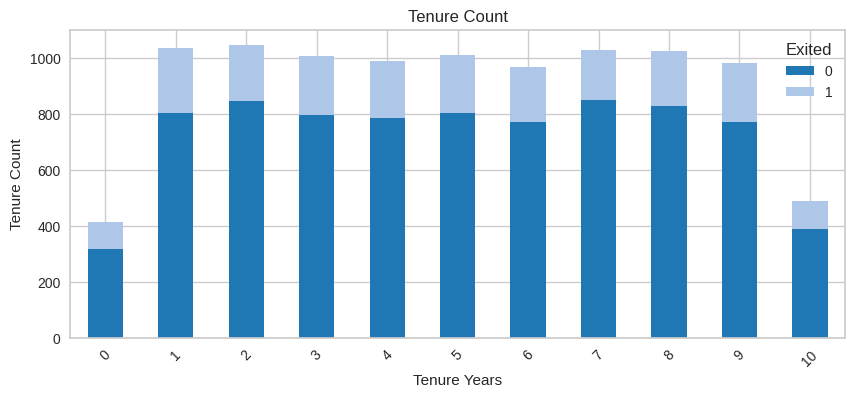

In [ ]:
# Agrupar los datos por Tenure y Exited
tenure_counts = bank.groupby(['Tenure', 'Exited']).size().unstack(fill_value=0)

# Crear el gráfico de barras apiladas con una paleta de color azul
colors = ['#1f77b4', '#aec7e8']  # lista de colores azules
tenure_counts.plot(kind='bar', stacked=True, figsize=(10,4), title='Tenure Count', color=colors)
plt.xticks(rotation=45)
plt.xlabel('Tenure Years')
plt.ylabel('Tenure Count')
plt.show()


Insights:

Según el análisis, los clientes bancarios abandonaron el porcentaje más alto durante el primer año. Mas alla de eso no marca una tendencia determinante ya que la tasa de abandono no varia en el trascurso de los años de permanencia.
Es decir, si el cliente está satisfecho con sus servicios, continuaría operando en su banco actual.


## 3.8 Informe sobre análisis de tasa de abandono de clientes

Haciendo un análisis sobre la tasa de abandono según diferentes atributos,
se observó que la tasa de abandono es de aproximadamente el 20,38%. Además, que la edad promedio de abandono es entre 45 a 55.

En conclusión, el análisis exploratorio de datos permitió identificar varios factores que influyen en la tasa de abandono de los clientes. El nivel economico como el nivel de servicios son variables importantes a considerar para la retención de clientes. Ademas se encontró que existe una relación entre las quejas y la tasa de abandono. Los clientes que en algun momento emitieron una queja tienen una tasa de abandono más alta.



---



# 4.Selección de Features


Previo a seleccionar las variables a utilizar en los modelos, se realiza una limpieza del dataset original, eliminado las columnas inecesiarias, modificando las variables categoricas en numericas. Como resultado de las modificaciones realizaras se genera un dataframe con las columnas necesarias.
Tambien se uliliza una matrix de correlacion para detectar las relaciones entre las variables.

In [ ]:
bank = pd.read_csv('Customer-Churn-Records.csv')

## 4.1 Limpieza del dataset

In [ ]:
hot = pd.get_dummies(bank[['Geography', 'Gender', 'Card Type']])

In [ ]:
#Se modifica las variables categoricas en números
codificacion_manual = {"Male": 1, "Female": 2}
bank["Gender"] = bank["Gender"].map(codificacion_manual)

cod_manual = {"Spain": 1, "France": 2, "Germany": 3}
bank["Geography"] = bank["Geography"].map(cod_manual)

c_manual = {"DIAMOND": 1, "GOLD": 2, "PLATINUM": 3, "SILVER": 4}
bank["Card Type"] = bank["Card Type"].map(c_manual)

In [ ]:
#Se elimina la columna innecesaria
bank.drop(columns =['Surname'])

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,619,2,2,42,2,0.00,1,1,1,101348.88,1,1,2,1,464
1,2,15647311,608,1,2,41,1,83807.86,1,0,1,112542.58,0,1,3,1,456
2,3,15619304,502,2,2,42,8,159660.80,3,1,0,113931.57,1,1,3,1,377
3,4,15701354,699,2,2,39,1,0.00,2,0,0,93826.63,0,0,5,2,350
4,5,15737888,850,1,2,43,2,125510.82,1,1,1,79084.10,0,0,5,2,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,2,1,39,5,0.00,2,1,0,96270.64,0,0,1,1,300
9996,9997,15569892,516,2,1,35,10,57369.61,1,1,1,101699.77,0,0,5,3,771
9997,9998,15584532,709,2,2,36,7,0.00,1,0,1,42085.58,1,1,3,4,564
9998,9999,15682355,772,3,1,42,3,75075.31,2,1,0,92888.52,1,1,2,2,339


In [ ]:
#Analizo las variables categoricas
nuevas_columnas = ["Exited", "CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "Complain", "Satisfaction Score", "Card Type" ,"Point Earned"]
banco = bank[nuevas_columnas]

## 4.2 Matrix de correlación

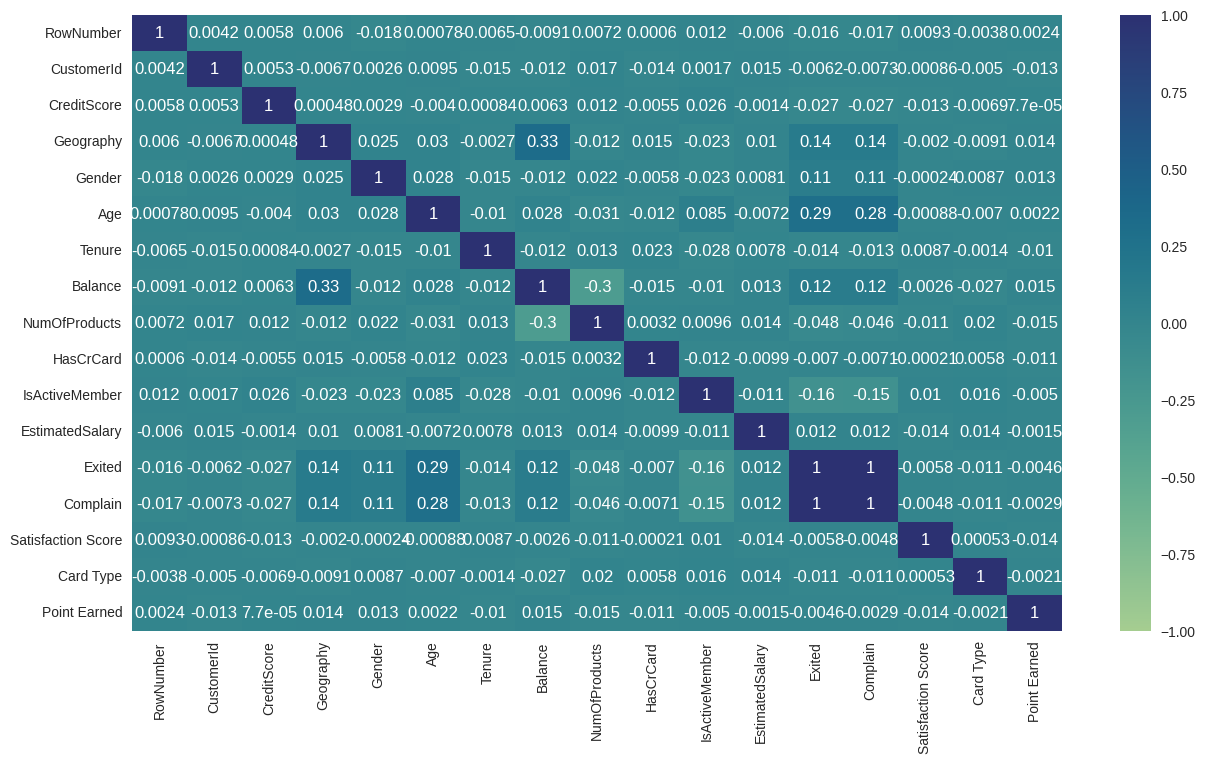

In [ ]:
#matrix de correlacion
correlation_matrix = bank.corr()
rounded_matrix = np.round(correlation_matrix, decimals=1)
plt.figure(figsize = (15,8))
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, annot=True, cmap='crest')
plt.show()

Como conclusion de lo reflejado en el analisis del heatmap, existe una relacion significativa entre las variables "exited"(abandono) y "Complain" (quejas). Esta ultima no se tendra en cuenta para los modelos predictivos ya que alteraria los resultados finales.

## 4.3 Generador de Dataframe

In [ ]:
# Creo el DataFrame con las columnas necesarias, eliminando la columna complain
df_categ = bank[['Exited', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Satisfaction Score', 'Card Type' ,'Point Earned']].copy()
print (df_categ)

      Exited  CreditScore  Geography  Gender  Age  Tenure    Balance  \
0          1          619          2       2   42       2       0.00   
1          0          608          1       2   41       1   83807.86   
2          1          502          2       2   42       8  159660.80   
3          0          699          2       2   39       1       0.00   
4          0          850          1       2   43       2  125510.82   
...      ...          ...        ...     ...  ...     ...        ...   
9995       0          771          2       1   39       5       0.00   
9996       0          516          2       1   35      10   57369.61   
9997       1          709          2       2   36       7       0.00   
9998       1          772          3       1   42       3   75075.31   
9999       0          792          2       2   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0                 1          1               1        101348.88   
1

In [ ]:
print("Filas, columnas: ", df_categ.shape)

# Nombres de las variables
print("\nNombres de las variables: \n", df_categ.columns)

# Tipo de datos de cada variable
print("\nTipos de datos: \n", df_categ.dtypes)

# Verificar la presencia de valores faltantes
print("\nValores faltantes: \n", df_categ.isnull().sum())

# Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas: \n", df_categ.describe(include=[np.number]))

# Frecuencia de valores únicos en las variables categóricas
for col in df_categ.select_dtypes(include=['object']).columns:
    print("\nFrecuencia de valores únicos de", col)
    print(df_categ[col].value_counts())

Filas, columnas:  (10000, 14)

Nombres de las variables: 
 Index(['Exited', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

Tipos de datos: 
 Exited                  int64
CreditScore             int64
Geography               int64
Gender                  int64
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Satisfaction Score      int64
Card Type               int64
Point Earned            int64
dtype: object

Valores faltantes: 
 Exited                0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMemb

In [ ]:
x = df_categ.drop('Exited', axis=1)
y = df_categ['Exited']

### 4.4 Metodología de selección de Features

### 4.4.1 Forward selection

In [ ]:
best_features, pvals = forward_selection(x,y,significance_level=0.05)

['Age'] 1.3467162476199604e-186
['Age', 'IsActiveMember'] 2.6949580141989645e-81
['Age', 'IsActiveMember', 'Geography'] 5.33843954480495e-41
['Age', 'IsActiveMember', 'Geography', 'Gender'] 1.4890478501973877e-22
['Age', 'IsActiveMember', 'Geography', 'Gender', 'Balance'] 3.329069580896264e-15
['Age', 'IsActiveMember', 'Geography', 'Gender', 'Balance', 'CreditScore'] 0.018007240376889715


### 4.4.2 Backward selection

In [ ]:
best_features, worst_features, pvals_worst_features = backward_elimination(x,y, significance_level=0.05)

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Satisfaction Score', 'Card Type', 'Point Earned'] 2.1855459581163115e-206
['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Card Type', 'Point Earned'] 2.0459330050121167e-206
['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Point Earned'] 1.753711487216644e-206
['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Point Earned'] 1.355818631777189e-206
['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary'] 1.4179585132726818e-206
['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'IsActiveMember'] 1.7183262440990174e-206


### 4.4.3 Stepwise selection

In [ ]:
best_features = stepwise_selection(x,y,SL_in=0.05,SL_out = 0.05)

['Age'] 1.3467162476199604e-186
['Age', 'IsActiveMember'] 2.6949580141989645e-81
['Age', 'IsActiveMember', 'Geography'] 5.33843954480495e-41
['Age', 'IsActiveMember', 'Geography', 'Gender'] 1.4890478501973877e-22
['Age', 'IsActiveMember', 'Geography', 'Gender', 'Balance'] 3.329069580896264e-15
['Age', 'IsActiveMember', 'Geography', 'Gender', 'Balance', 'CreditScore'] 0.018007240376889715


Para poder seleccionar los features a utilizar en los modelos, se utilizaron  las metodologías de Forward , Backward y Stepwise con un 95% de confianza.
En todos las metodologías da como resultados las mismas variables.-



# 5. Entrenamiento y Testeo

## 5.1 División de datos

In [ ]:
x = df_categ[{'Age', 'IsActiveMember', 'Geography', 'Gender', 'Balance', 'CreditScore'}]
y = df_categ['Exited']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#Separo en train y test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#Normalizamos los datos para que PCA funcione mejor!
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#Aplicacion de PCA
from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
#Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.22370341, 0.18183436, 0.16901804, 0.16674865, 0.14828346,
       0.11041207])



Insights:

No hay un componente determinante principal. Pero en el conjunto de las varianzas el 99% se concentra en esos componentes.-

Para finalizar, usemos una sola componente para entrenar un modelo de Random Forest y evaluar qué tan bien funciona!

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo
model_rf = RandomForestClassifier(max_depth=2, random_state=0)
model_rf.fit(x_train, y_train)

# Predicción
y_pred = model_rf.predict(x_test)

In [ ]:
#Evaluación básica del modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('El accuracy del modelo es:', accuracy)

El accuracy del modelo es: 0.8035


Insights:

Únicamente utilizando una componente tenemos un accuracy de 80.3%.

## 5.2 Entrenamiento y evaluación de modelos:

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### 5.2.1 Modelo de árbol de decisión



In [ ]:
# Modelo
dt = DecisionTreeClassifier(random_state=42)

# Entrenamiento
dt.fit(x_train, y_train)

# Predicción
y_pred = dt.predict(x_test)

# Precisión
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo de árbol de decisión:", accuracy)

Precisión del modelo de árbol de decisión: 0.7625


### 5.2.2 Regresión logística

In [ ]:
# Modelo
lr = LogisticRegressionCV(cv=5, max_iter=1000, random_state=42)

# Entrenamiento
lr.fit(x_train, y_train)

# Predicción
y_pred = lr.predict(x_test)

# Precisión
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo de regresión logística:", accuracy)

Precisión del modelo de regresión logística: 0.8015


### 5.2.3 Redes neuronales artificiales

In [ ]:
# Modelo
nn = MLPClassifier(max_iter = 500)

# Entrenamiento
nn.fit(x_train, y_train)

# Predicción
y_pred = nn.predict(x_test)

# Precisión
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo de red neuronal:", accuracy)

Precisión del modelo de red neuronal: 0.793


## 5.3 Validación cruzada

In [ ]:
num_folds = 5

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

models = [
    ('Regresion Logistica', LogisticRegressionCV(max_iter=1000)),
    ('Arbol de Decision', DecisionTreeClassifier()),
    ('Red Neuronal', MLPClassifier(max_iter=10000))
]

# Metricas
results = []
names = []
print('Metricas \n----------------------\n')
for name, model in models:
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {round(cv_results.mean(), 5)} ({round(cv_results.std(), 5)})')

Metricas 
----------------------

Regresion Logistica: 0.79125 (0.01105)
Arbol de Decision: 0.75288 (0.00701)
Red Neuronal: 0.70725 (0.16557)


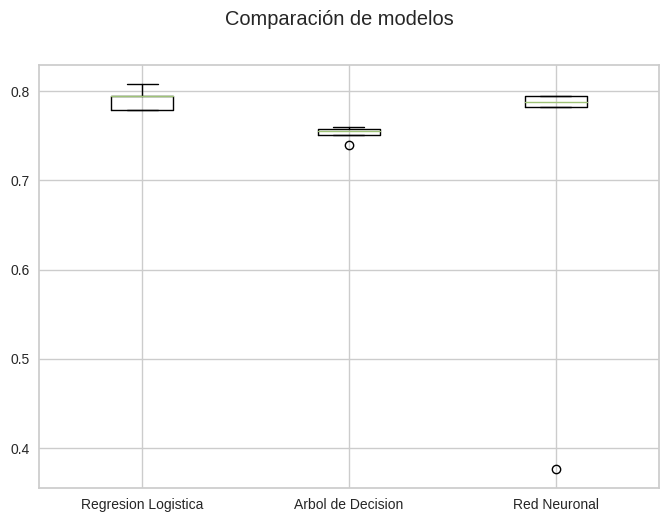

In [ ]:
# Grafico los resultados de la validación cruzada
fig = plt.figure()
fig.suptitle('Comparación de modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Para el proyecto se elegieron los modelos de regresion Logística, Arbol de decisión y Red Neuronal, dando como resultado un mejor porcentaje de eficacia el modelos de Regresión Logística con un 79%.

La regresión logística es un modelo lineal que funciona bien para clasificar la salida en problemas binarios como el de la tasa de abandono. Este modelo también es fácil de interpretar y entender, y tiene la ventaja de ser rápido para implementar. Además, permite la selección de características y la optimización de hiperparámetros.
El árbol de decisiónes útil para entender la estructura y la importancia de las características, y puede ser fácilmente interpretado y visualizado. Además, puede manejar fácilmente características categóricas y numéricas.

En general, se utilizaron estos tres modelos porque proporcionan distintos enfoques para modelar los datos y pueden ser combinados para mejorar la precisión de las predicciones. Además, se eligieron porque son comúnmente utilizados para resolver problemas de clasificación y regresión en el aprendizaje supervisado.


# 6. Optimización y selección de modelo

In [ ]:
# Hiperparámetros
params = [{'Regresion Logistica__Cs': [1, 10],
           'Regresion Logistica__penalty': ['l1', 'l2'],
           'Regresion Logistica__solver': ['liblinear']},

          {'Arbol de Decision__max_depth': [2, 4, 6],
           'Arbol de Decision__min_samples_split': [2, 4, 6]},

          {'Red Neuronal__hidden_layer_sizes': [(10,), (50,), (100,)],
           'Red Neuronal__activation': ['relu', 'logistic'],
           'Red Neuronal__alpha': [0.0001, 0.01, 0.1]}]


result = []
best_models = []
# Búsqueda de hiperparámetros para cada modelo
for i, (name, model) in enumerate(models):
    pipe = Pipeline([(name, model)])
    grid = GridSearchCV(pipe, params[i], cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
    grid.fit(x_train, y_train)

    best_model = (name, grid.best_estimator_)
    best_score = grid.best_score_
    best_models.append(best_model)
    result.append({'Modelo': name, 'Score': round(best_score, 5), 'Hiperparámetros': grid.best_params_})

    print(name + ':')
    print('Mejores parametros:', grid.best_params_)
    print('Precisión del entrenamiento:', round(grid.best_score_, 5))
    print('Precisión del test:', round(grid.score(x_test, y_test), 5))
    print('--------------------------------------------')

# Ordenamiento de los resultados
result = sorted(result, key=lambda k: k['Score'], reverse=True)
print('Orden de los modelos: ')
for res in result:
    print(res)

Regresion Logistica:
Mejores parametros: {'Regresion Logistica__Cs': 10, 'Regresion Logistica__penalty': 'l1', 'Regresion Logistica__solver': 'liblinear'}
Precisión del entrenamiento: 0.81
Precisión del test: 0.814
--------------------------------------------
Arbol de Decision:
Mejores parametros: {'Arbol de Decision__max_depth': 6, 'Arbol de Decision__min_samples_split': 2}
Precisión del entrenamiento: 0.83162
Precisión del test: 0.841
--------------------------------------------
Red Neuronal:
Mejores parametros: {'Red Neuronal__activation': 'logistic', 'Red Neuronal__alpha': 0.0001, 'Red Neuronal__hidden_layer_sizes': (10,)}
Precisión del entrenamiento: 0.79438
Precisión del test: 0.8035
--------------------------------------------
Orden de los modelos: 
{'Modelo': 'Arbol de Decision', 'Score': 0.83162, 'Hiperparámetros': {'Arbol de Decision__max_depth': 6, 'Arbol de Decision__min_samples_split': 2}}
{'Modelo': 'Regresion Logistica', 'Score': 0.81, 'Hiperparámetros': {'Regresion Logi

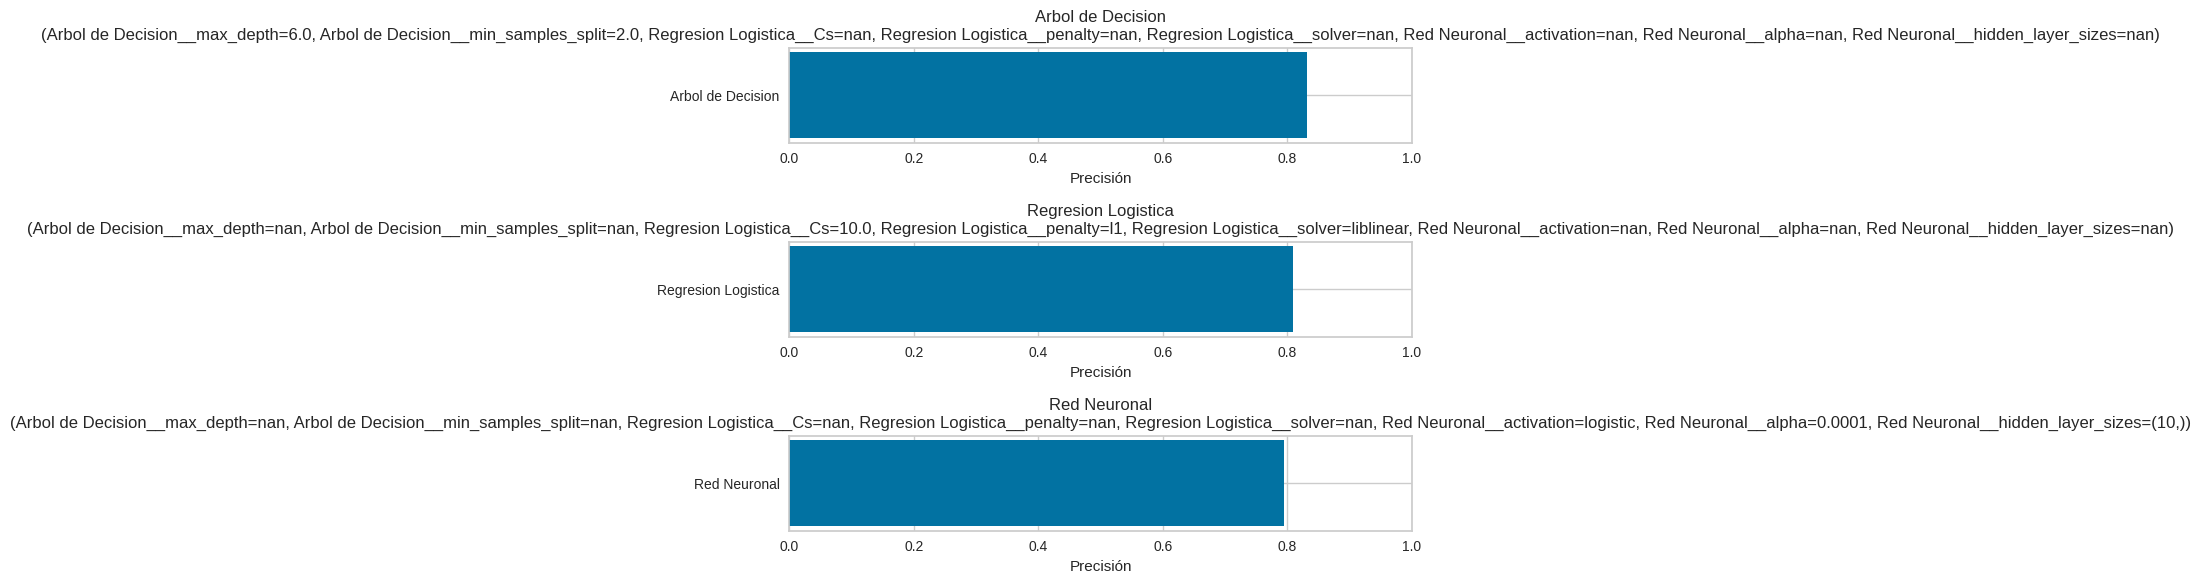

In [ ]:
# Convertir los resultados a un DataFrame de pandas
df = pd.DataFrame(result)
df = pd.concat([df.drop(['Hiperparámetros'], axis=1),
                df['Hiperparámetros'].apply(pd.Series)], axis=1)

# Grafico los resultados de los modelos con los hiperparámetros
fig, axs = plt.subplots(nrows=len(df), figsize=(8, 2*len(df)))
for i, row in df.iterrows():
    model_name = row['Modelo']
    score = row['Score']
    params = row.drop(['Modelo', 'Score'])
    params_string = ', '.join(f'{key}={val}' for (key, val) in params.items())
    axs[i].barh(model_name, score)
    axs[i].set_title(f'{model_name}\n({params_string})')
    axs[i].set_xlim(0, 1.0)
    axs[i].set_xlabel('Precisión')
plt.tight_layout()
plt.show()

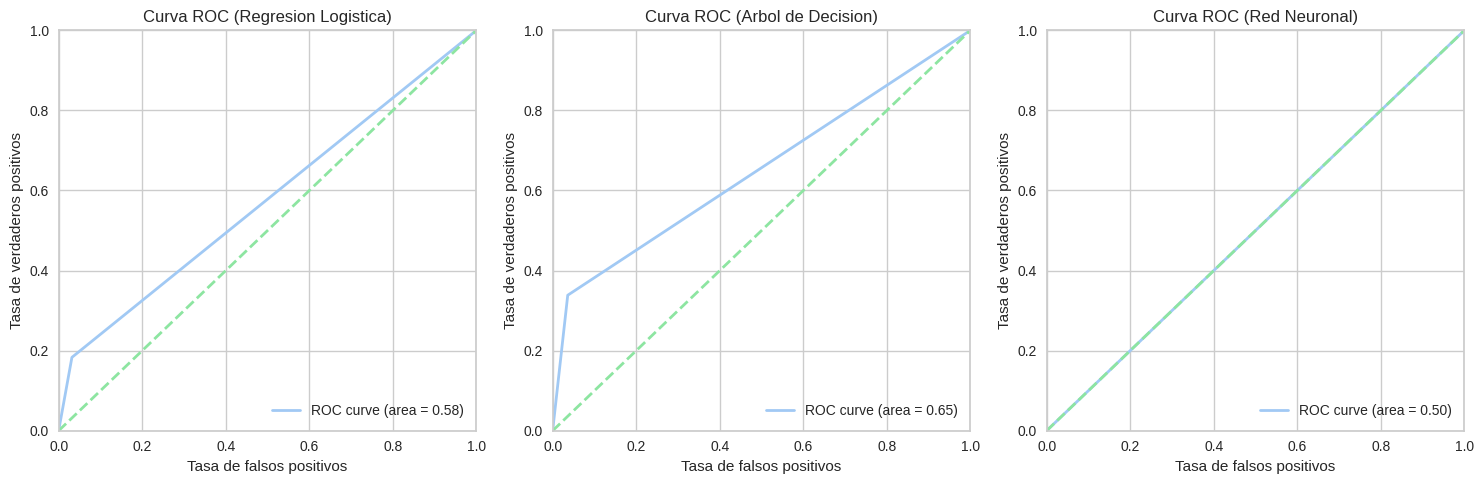

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axs = axs.flatten()

for i, (name, model) in enumerate(models):
    y_pred = best_models[i][1].predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Gráficas
    df_temp = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
    colors = sns.color_palette('pastel')
    sns.lineplot(x='fpr', y='tpr', data=df_temp, color=colors[0], lw=2, label='ROC curve (area = %0.2f)' % roc_auc, ax=axs[i])
    axs[i].plot([0, 1], [0, 1], color=colors[2], lw=2, linestyle='--')
    axs[i].set_xlim([0.0, 1.0])
    axs[i].set_ylim([0.0, 1.0])
    axs[i].set_xlabel('Tasa de falsos positivos')
    axs[i].set_ylabel('Tasa de verdaderos positivos')
    axs[i].set_title('Curva ROC (' + name + ')')
    axs[i].legend(loc="lower right")



plt.tight_layout()
plt.show()

# 7. Conclusión

En el proyecto se trabajó con un conjunto de datos que contiene información sobre varios aspectos que conformarma una cartilla de clientes de una entidad bancaria, con el objetivo de predecir la tasa de abandono. A través de un análisis exploratorio de datos, se identificaron varios factores que influyen en la tasa de abandono de los clientes, como la edad, genero, nivel patrimonial, limite de creditos y si es un cliente activo . Se genero un dataframe con las variables mas importantes, excluyendo la variable de quejas ya que si se tiene en cuenta los modelos se veian directamentes afectados.

Se aplicaron tres modelos de aprendizaje supervisado para predecir la tasa de abandono de los clientes: Regresión Logística, Árbol de Decisión,y Red Neuronal. Después de optimizar los modelos, se encontró que el modelo de Arbol de Decisión tuvo el mejor desempeño en términos de precisión de prueba, es decir es más precisas a la hora de predecir valores de abandono comparado con los modelos de Regresión Logística y Red Neuronal.

Además de los resultados obtenidos en la precisión de los modelos, es importante destacar que se utilizaron técnicas como la selección de características y la optimización de hiperparámetros para mejorar aún más el desempeño. Estas técnicas permitieron identificar las variables más relevantes para la predicción y ajustar los parámetros del modelo para obtener un mejor desempeño.

Adicionalmente, la realización de validación cruzada permitio evaluar el desempeño de los modelos y detectar posibles problemas de sobreajuste o subajuste. Esto es fundamental para asegurar que los modelos sean capaces de generalizar a datos nuevos y no solo memorizar los datos de entrenamiento.

En términos prácticos, los resultados y técnicas utilizadas permiten obtener un modelo robusto y confiable para predecir la tasa de abandono de clientes en el banco esto significa que el banco podría utilizar estos modelos para identificar a los clientes que son más propensos a abandonar sus cuentas y tomar medidas para retenerlos, como ofrecerles incentivos o mejorar la calidad de sus servicios. De esta manera, el banco puede mejorar la retención de clientes, lo que puede tener un impacto positivo en su rentabilidad a largo plazo y reducir los costos asociados a atraer nuevos clientes.
